In [1]:
# Download the daily data (from 1/3/2020 to 1/Mar/2021) for the Amazon.com, Inc. (AMZN) and the Tesla, Inc. (TSLA) from Yahoo Finance by using yfinance package.
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
data = yf.download("AMZN TSLA", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  2 of 2 completed


In [3]:
data.head()

Adj Close                    Close                     High  \
                   AMZN        TSLA         AMZN        TSLA         AMZN   
Date                                                                        
2020-03-02  1953.949951  148.723999  1953.949951  148.723999  1954.510010   
2020-03-03  1908.989990  149.102005  1908.989990  149.102005  1996.329956   
2020-03-04  1975.829956  149.899994  1975.829956  149.899994  1978.000000   
2020-03-05  1924.030029  144.908005  1924.030029  144.908005  1960.719971   
2020-03-06  1901.089966  140.695999  1901.089966  140.695999  1910.869995   

                                Low                     Open              \
                  TSLA         AMZN        TSLA         AMZN        TSLA   
Date                                                                       
2020-03-02  148.738007  1870.000000  137.334000  1906.489990  142.251999   
2020-03-03  161.395996  1888.089966  143.222000  1975.369995  161.000000   
2020-03-04  153.304001  1922.000000  144.945999  1946.569946  152.792007   
2020-03-05  149.149994  1910.000000  143.613998  1933.000000  144.753998   
2020-03-06  141.399994  1869.500000  136.854004  1875.000000  138.000000   

             Volume             
               AMZN       TSLA  
Date                            
2020-03-02  6761700  100975000  
2020-03-03  7534500  128920000  
2020-03-04  4772900   75245000  
2020-03-05  4748200   54263500  
2020-03-06  5273600   63314500

In [4]:
data.tail()

Adj Close                    Close                     High  \
                   AMZN        TSLA         AMZN        TSLA         AMZN   
Date                                                                        
2021-02-22  3180.739990  714.500000  3180.739990  714.500000  3232.320068   
2021-02-23  3194.500000  698.840027  3194.500000  698.840027  3204.729980   
2021-02-24  3159.530029  742.020020  3159.530029  742.020020  3171.229980   
2021-02-25  3057.159912  682.219971  3057.159912  682.219971  3178.260010   
2021-02-26  3092.929932  675.500000  3092.929932  675.500000  3122.439941   

                                Low                     Open              \
                  TSLA         AMZN        TSLA         AMZN        TSLA   
Date                                                                       
2021-02-22  768.500000  3172.260010  710.200012  3208.129883  762.640015   
2021-02-23  713.609985  3093.600098  619.000000  3127.030029  662.130005   
2021-02-24  745.000000  3125.379883  694.169983  3166.750000  711.849976   
2021-02-25  737.210022  3047.760010  670.580017  3136.739990  726.150024   
2021-02-26  706.700012  3036.699951  659.510010  3095.199951  700.000000   

             Volume            
               AMZN      TSLA  
Date                           
2021-02-22  3515700  37269700  
2021-02-23  4677200  66606900  
2021-02-24  3011300  36767000  
2021-02-25  4533800  39023900  
2021-02-26  4273500  41011300

In [5]:
# Save the adjusted close price of these two stocks as a ‘pandas’ DataFrame Called ‘ADJ’. Plot the figure of these two prices.
ADJ = data["Adj Close"]
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    251 non-null    float64
 1   TSLA    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

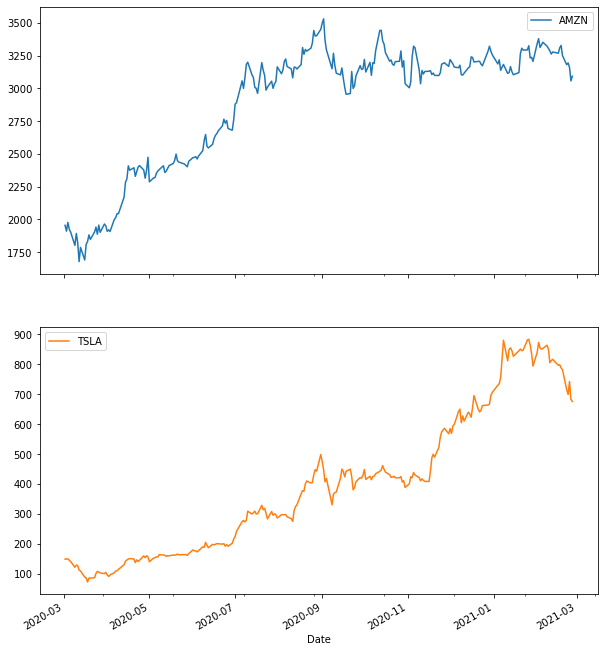

In [6]:
ADJ.plot(figsize=(10, 12), subplots=True)

In [7]:
# . Show the statistical description of ADJ and get the daily return of these two stocks.
ADJ.describe().round(2)

,AMZN,TSLA
count,251.00,251.00
mean,2877.47,394.25
std,475.36,235.65
min,1676.61,72.24
25%,2471.72,169.94
50%,3111.89,387.79
75%,3205.60,561.49
max,3531.45,883.09


In [8]:
returns = np.log(ADJ / ADJ.shift(1)) # daily log returns
returns.head().round(4)

,AMZN,TSLA
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0233,0.0025
2020-03-04,0.0344,0.0053
2020-03-05,-0.0266,-0.0339
2020-03-06,-0.0120,-0.0295


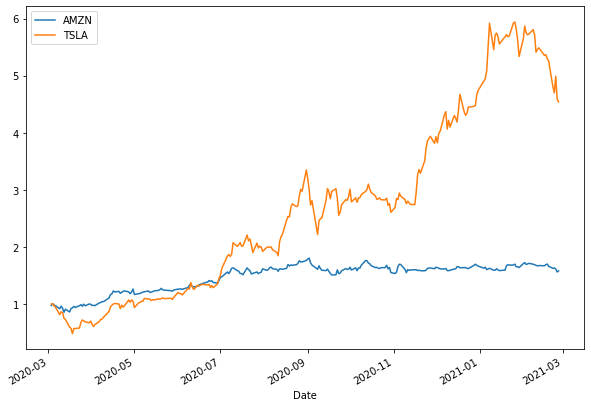

In [9]:
# Plot the cumsum of the log returns in one figure and compare the trends.
returns.cumsum().apply(np.exp).plot(figsize=(10, 7));
# log returns comparison, TSLA increasing at steeper rate than AMZN

In [10]:
# Find the SMA1 (10 days 'short term') and SAM2 (60 days 'long term') for AMZN. Plot the close price of AMZN with SMA1, SMA2 and the position trend line.
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2021-02-22,3180.739990
2021-02-23,3194.500000
2021-02-24,3159.530029
2021-02-25,3057.159912
2021-02-26,3092.929932


In [11]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=10).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2021-02-22,3180.739990,3279.081958,3222.121818
2021-02-23,3194.500000,3266.237964,3223.395817
2021-02-24,3159.530029,3251.690967,3222.970150
2021-02-25,3057.159912,3228.748950,3220.667147
2021-02-26,3092.929932,3211.828955,3219.415312


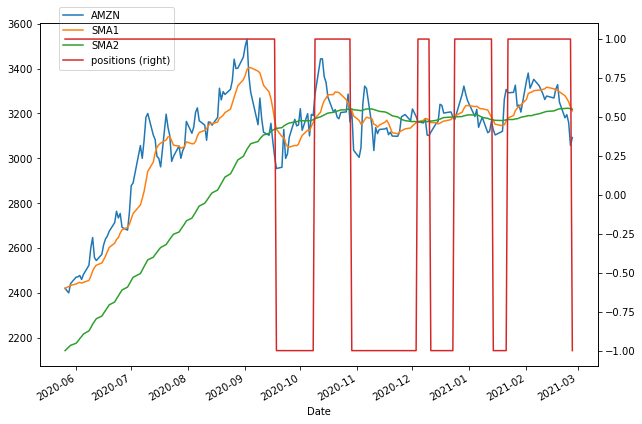

In [12]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 7),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

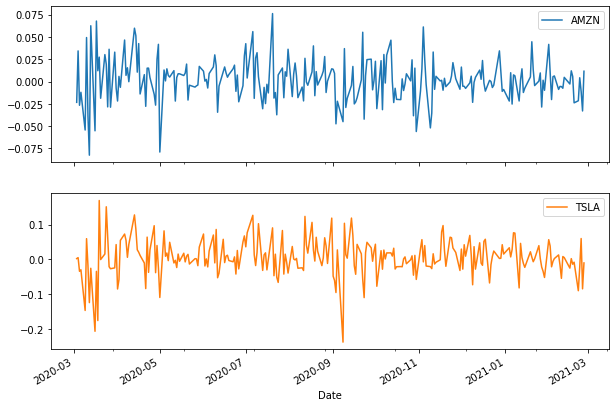

In [13]:
returns.dropna(inplace=True) # inplace algo: when inplace = True is used, it performs operation on data and nothing is returned
returns.plot(subplots=True, figsize=(10, 7)) #subplot provides a way to plot multiple plots on a single figure

array([[<AxesSubplot:xlabel='AMZN', ylabel='AMZN'>,
        <AxesSubplot:xlabel='TSLA', ylabel='AMZN'>],
       [<AxesSubplot:xlabel='AMZN', ylabel='TSLA'>,
        <AxesSubplot:xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

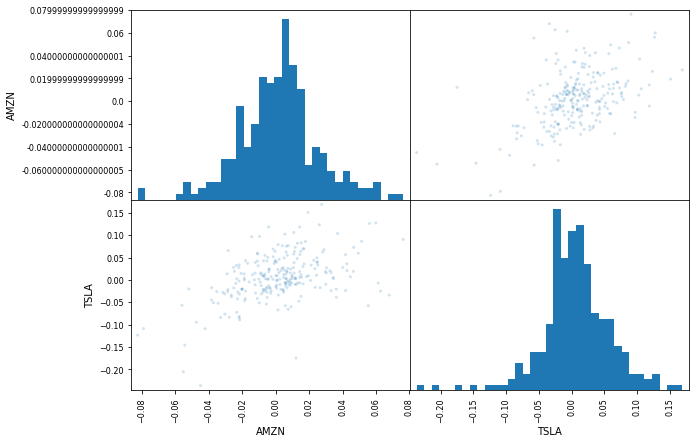

In [14]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 7))

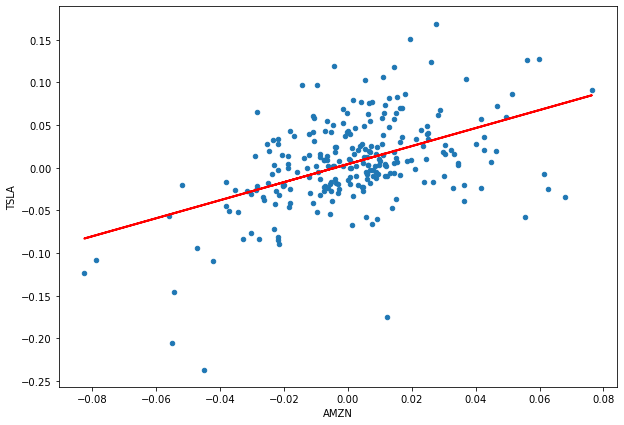

In [15]:
reg = np.polyfit(returns['AMZN'], returns['TSLA'], deg=1) #reg is regression
ax = returns.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 7))
ax.plot(returns['AMZN'], np.polyval(reg, returns['AMZN']), 'r', lw=2);

In [16]:
returns.corr()

,AMZN,TSLA
AMZN,1.000000,0.477949
TSLA,0.477949,1.000000


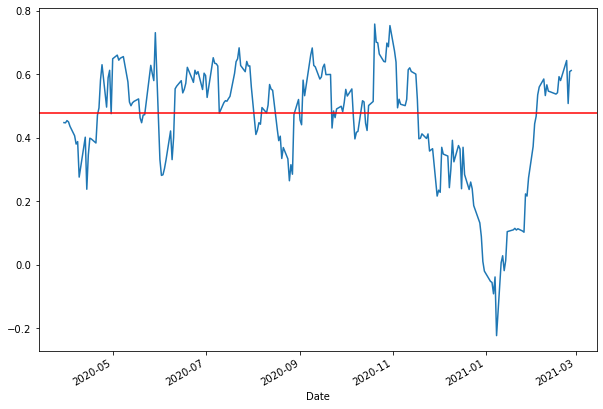

In [17]:
ax = returns['AMZN'].rolling(window=20).corr(returns['TSLA']).plot(figsize=(10, 7)) 
ax.axhline(returns.corr().iloc[0, 1], c='r');